In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import os
import sys
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import pyarrow.parquet as pq
from matplotlib.backends.backend_pdf import PdfPages 
from matplotlib.path import Path
from enum import Enum
from typing import Union

import gc
gc.collect()

5951

In [58]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()
sys.path.append('/groups/icecube/cyan/factory/DOMification')
from Enum.Flavour import Flavour
from Enum.EnergyRange import EnergyRange
from EventPeek.PseudoNormaliser import PseudoNormaliser

In [59]:
# root_dir_noCR_CC_IN = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied_filtered_third_round/Snowstorm/CC_CRclean_Contained/"
root_dir = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied_third/Snowstorm/"
er = EnergyRange.ER_10_TEV_1_PEV
flavour = Flavour.MU
# dir_TeV_nu_mu_1_1 = os.path.join(root_dir, EnergyRange.get_subdir(er, flavour), "1", "PMTfied_1.parquet")
dir_TeV_nu_mu_1_truth = os.path.join(root_dir, EnergyRange.get_subdir(er, flavour), "truth_1.parquet")
dir_TeV_nu_e_1_truth = os.path.join(root_dir, EnergyRange.get_subdir(er, Flavour.E), "truth_1.parquet")
dir_TeV_nu_tau_1_truth = os.path.join(root_dir, EnergyRange.get_subdir(er, Flavour.TAU), "truth_1.parquet")

In [60]:
def convertParquetToDF(file:str) -> pd.DataFrame:
    table = pq.read_table(file)
    df = table.to_pandas()
    return df

In [61]:
df_TeV_nu_mu_1_truth = convertParquetToDF(dir_TeV_nu_mu_1_truth)
df_TeV_nu_e_1_truth = convertParquetToDF(dir_TeV_nu_e_1_truth)
df_TeV_nu_tau_1_truth = convertParquetToDF(dir_TeV_nu_tau_1_truth)

In [62]:
df_TeV_nu_mu_1_truth

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,...,SolidAngle,TotalColumnDepthCGS,TotalPrimaryWeight,TotalWeight,TotalXsectionCGS,TrueActiveLengthAfter,TrueActiveLengthBefore,TypeWeight,max_interPMT_distance,isWithinIceCube
0,111000100000000,0,11,1,1,105,105,73680.617188,4.307122,1.088073,...,12.566371,6.009304e+05,1.0,0.000070,1.960715e-34,1168.848267,5070.489746,0.5,662.352478,0
1,111000100000001,1,11,1,1,22,127,32701.998047,5.686655,1.499501,...,12.566371,1.926092e+06,1.0,0.000165,1.436851e-34,869.106262,20424.208984,0.5,489.899719,0
2,111000100000002,2,11,1,1,32,159,19012.628906,2.446139,2.935971,...,12.566371,1.664943e+06,1.0,0.000024,9.336015e-35,967.824585,6522.270996,0.5,855.056519,0
3,111000100000003,3,11,1,1,114,273,193913.015625,0.011026,0.919336,...,12.566371,3.077045e+05,1.0,0.000076,4.115322e-34,822.320068,2573.304199,0.5,685.891113,1
4,111000100000004,4,11,1,1,56,329,34504.023438,3.537292,0.865747,...,12.566371,4.305571e+05,1.0,0.000038,1.489830e-34,644.541565,3825.816162,0.5,487.588226,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400556,111000100400556,400556,11,1,21,36,61894,64373.804688,4.020282,1.234511,...,12.566371,8.445134e+05,1.0,0.000111,2.200819e-34,754.690552,8013.042969,0.5,507.115936,0
400557,111000100400557,400557,11,1,21,86,61980,12075.637695,1.717506,1.159337,...,12.566371,5.426034e+05,1.0,0.000023,7.114973e-35,1043.896240,4929.800293,0.5,978.476501,1
400558,111000100400558,400558,11,1,21,101,62081,514538.218750,3.287061,0.733917,...,12.566371,3.317223e+05,1.0,0.000135,6.812587e-34,1071.615112,2574.217041,0.5,1185.431641,0
400559,111000100400559,400559,11,1,21,122,62203,36726.781250,5.069555,1.316832,...,12.566371,9.629387e+05,1.0,0.000089,1.551492e-34,1098.739624,9486.470703,0.5,1037.328247,0


In [63]:
df_TeV_nu_mu_1_truth[['pos_x_GNHighestEDaughter', 'pos_y_GNHighestEDaughter', 'pos_z_GNHighestEDaughter']].describe()

,pos_x_GNHighestEDaughter,pos_y_GNHighestEDaughter,pos_z_GNHighestEDaughter
count,4.005610e+05,4.005610e+05,4.005610e+05
mean,4.595285e+02,-2.789966e+02,-3.466050e+05
std,6.757467e+05,6.706101e+05,1.414062e+06
min,-6.353455e+06,-6.296344e+06,-1.267446e+07
25%,-7.550175e+02,-7.507460e+02,-7.652493e+02
50%,-2.220463e+00,2.466191e+00,-1.442627e+01
75%,7.550272e+02,7.572172e+02,6.327634e+02
max,6.358274e+06,6.254395e+06,1.947900e+03


In [64]:
border_xy = np.array(
    [
        (-256.1400146484375, -521.0800170898438),
        (-132.8000030517578, -501.45001220703125),
        (-9.13000011444092, -481.739990234375),
        (114.38999938964844, -461.989990234375),
        (237.77999877929688, -442.4200134277344),
        (361.0, -422.8299865722656),
        (405.8299865722656, -306.3800048828125),
        (443.6000061035156, -194.16000366210938),
        (500.42999267578125, -58.45000076293945),
        (544.0700073242188, 55.88999938964844),
        (576.3699951171875, 170.9199981689453),
        (505.2699890136719, 257.8800048828125),
        (429.760009765625, 351.0199890136719),
        (338.44000244140625, 463.7200012207031),
        (224.5800018310547, 432.3500061035156),
        (101.04000091552734, 412.7900085449219),
        (22.11000061035156, 509.5),
        (-101.05999755859375, 490.2200012207031),
        (-224.08999633789062, 470.8599853515625),
        (-347.8800048828125, 451.5199890136719),
        (-392.3800048828125, 334.239990234375),
        (-437.0400085449219, 217.8000030517578),
        (-481.6000061035156, 101.38999938964844),
        (-526.6300048828125, -15.60000038146973),
        (-570.9000244140625, -125.13999938964844),
        (-492.42999267578125, -230.16000366210938),
        (-413.4599914550781, -327.2699890136719),
        (-334.79998779296875, -424.5),
    ]
)

vertices_xy = np.array(
    [
        (-256.1400146484375, -521.0800170898438),
        (-570.9000244140625, -125.13999938964844),
        (-347.8800048828125, 451.5199890136719), # this guy
        (22.11000061035156, 509.5), # this guy
        (576.3699951171875, 170.9199981689453), # this guy
        (361.0, -422.8299865722656),
    ]
)
auxiliary_vertices_xy = np.array(
    [
        (101.04000091552734, 412.7900085449219),
        (338.44000244140625, 463.7200012207031),
        (269.70961549, 548.30058428),
    ]
    )
imaginary_vertex_xy = np.array([(269.70961549, 548.30058428)])
    
border_z = np.array([-512.82, 524.56])

In [65]:
ICECUBE_SIDE_CORNERS = {
    0: np.array([(269.70961549, 548.30058428, 524.56), (269.70961549, 548.30058428, -512.82),
                    (576.36999512, 170.91999817, 524.56), (576.36999512, 170.91999817, -512.82)]),
    1: np.array([(576.36999512, 170.91999817, 524.56), (576.36999512, 170.91999817, -512.82),
                    (361.0, -422.82998657, 524.56), (361.0, -422.82998657, -512.82)]),
    2: np.array([(361.0, -422.82998657, 524.56), (361.0, -422.82998657, -512.82),
                    (-256.14001465, -521.08001709, 524.56), (-256.14001465, -521.08001709, -512.82)]),
    3: np.array([(-256.14001465, -521.08001709, 524.56), (-256.14001465, -521.08001709, -512.82),
                    (-570.90002441, -125.13999939, 524.56), (-570.90002441, -125.13999939, -512.82)]),
    4: np.array([(-570.90002441, -125.13999939, 524.56), (-570.90002441, -125.13999939, -512.82),
                    (-347.88000488, 451.51998901, 524.56), (-347.88000488, 451.51998901, -512.82)]),
    5: np.array([(-347.88000488, 451.51998901, 524.56), (-347.88000488, 451.51998901, -512.82),
                    (269.70961549, 548.30058428, 524.56), (269.70961549, 548.30058428, -512.82)]),
    }
ICECUBE_BASE_CORNERS = {
    0: np.array([(269.70961549, 548.30058428, -512.82), 
                 (576.36999512, 170.91999817, -512.82),
                (361.0, -422.82998657, -512.82), 
                (-256.14001465, -521.08001709, -512.82),
                (-570.90002441, -125.13999939, -512.82),
                (-347.88000488, 451.51998901, -512.82)]),
    1: np.array([(269.70961549, 548.30058428, 524.56),
                (576.36999512, 170.91999817, 524.56),
                (361.0, -422.82998657, 524.56), 
                (-256.14001465, -521.08001709, 524.56),
                (-570.90002441, -125.13999939, 524.56),
                (-347.88000488, 451.51998901, 524.56)]),
    }

In [66]:
def sandbox():
    corner_0 = ICECUBE_SIDE_CORNERS[0][0]
    corner_1 = ICECUBE_SIDE_CORNERS[0][1]
    corner_2 = ICECUBE_SIDE_CORNERS[0][2]
    
    edge01 = corner_1 - corner_0
    edge12 = corner_2 - corner_1
    
    normal_manual = (edge01[1] * edge12[2] - edge01[2] * edge12[1],
                     edge01[2] * edge12[0] - edge01[0] * edge12[2],
                     edge01[0] * edge12[1] - edge01[1] * edge12[0])
    normal_manual = np.array(normal_manual)/np.linalg.norm(normal_manual)
    print("Manual normal vector:", normal_manual)
    
    normal_vector = np.cross(edge01, edge12)
    normal_vector = normal_vector / np.linalg.norm(normal_vector)
    print("Cross product normal vector:", normal_vector)
sandbox()

Manual normal vector: [-0.7760751 -0.6306405 -0.       ]
Cross product normal vector: [-0.7760751 -0.6306405 -0.       ]


In [67]:
def check_intersection_containment_one_side(intersection: np.ndarray, corner_set: np.ndarray) -> bool:
    """
    Check if a 3D point lies within a polygon (3D) defined by corner_set.
    Projects to 2D and uses a soft tolerance for robust containment.
    
    Parameters:
        intersection : np.ndarray
            A 3D point (shape: (3,))
        corner_set : np.ndarray
            An array of polygon corners (shape: (N, 3)), assumed to lie in the same plane.
    
    Returns:
        bool: True if intersection lies inside the polygon, False otherwise.
    """
    # Define the plane using first three points
    p0, p1, p2 = corner_set[:3]
    v1 = p1 - p0
    v2 = p2 - p0
    normal = np.cross(v1, v2)
    normal /= np.linalg.norm(normal)

    # Orthonormal basis vectors in the plane
    u = v1 / np.linalg.norm(v1)
    w = np.cross(normal, u)

    def project_to_plane(pt):
        vec = pt - p0
        return np.dot(vec, u), np.dot(vec, w)

    # Project the corners and the intersection
    polygon_2d = np.array([project_to_plane(c) for c in corner_set])
    point_2d = project_to_plane(intersection)

    # Use 2D polygon containment check with numerical tolerance
    return Path(polygon_2d, closed=True).contains_point(point_2d, radius=1e-8)


In [68]:
def compute_intersection_with_plane(pos: np.ndarray, direction: np.ndarray, corner_set: np.ndarray) -> Union[np.ndarray, None]:
    """
    Computes intersection point of a line with a plane defined by a polygon.
    
    Parameters:
        pos : np.ndarray
            Starting point of the line, shape (3,)
        direction : np.ndarray
            Direction vector of the line, shape (3,)
        corner_set : np.ndarray
            At least 3 points that define a plane, shape (N, 3)
    
    Returns:
        np.ndarray or None: The intersection point, or None if parallel to the plane.
    """
    corner_0, corner_1, corner_2 = corner_set[:3]
    edge01 = corner_1 - corner_0
    edge12 = corner_2 - corner_1
    normal = np.cross(edge01, edge12)
    normal /= np.linalg.norm(normal)

    denom = np.dot(normal, direction)
    if abs(denom) < 1e-12:  # Line is parallel to plane
        return None

    t = np.dot(normal, corner_0 - pos) / denom
    intersection = pos + t * direction
    return intersection


In [69]:
def find_line_prism_intersections(pos: np.ndarray, direction: np.ndarray) -> list:
    MAX_VALID_DISTANCE = 2000
    ICECUBE_SIDE_CORNERS = {
        0: np.array([(269.70961549, 548.30058428, 524.56), (269.70961549, 548.30058428, -512.82),
                        (576.36999512, 170.91999817, 524.56), (576.36999512, 170.91999817, -512.82)]),
        1: np.array([(576.36999512, 170.91999817, 524.56), (576.36999512, 170.91999817, -512.82),
                        (361.0, -422.82998657, 524.56), (361.0, -422.82998657, -512.82)]),
        2: np.array([(361.0, -422.82998657, 524.56), (361.0, -422.82998657, -512.82),
                        (-256.14001465, -521.08001709, 524.56), (-256.14001465, -521.08001709, -512.82)]),
        3: np.array([(-256.14001465, -521.08001709, 524.56), (-256.14001465, -521.08001709, -512.82),
                        (-570.90002441, -125.13999939, 524.56), (-570.90002441, -125.13999939, -512.82)]),
        4: np.array([(-570.90002441, -125.13999939, 524.56), (-570.90002441, -125.13999939, -512.82),
                        (-347.88000488, 451.51998901, 524.56), (-347.88000488, 451.51998901, -512.82)]),
        5: np.array([(-347.88000488, 451.51998901, 524.56), (-347.88000488, 451.51998901, -512.82),
                        (269.70961549, 548.30058428, 524.56), (269.70961549, 548.30058428, -512.82)]),
    }
    ICECUBE_BASE_CORNERS = {
        0: np.array([(269.70961549, 548.30058428, -512.82), 
                    (576.36999512, 170.91999817, -512.82),
                    (361.0, -422.82998657, -512.82), 
                    (-256.14001465, -521.08001709, -512.82),
                    (-570.90002441, -125.13999939, -512.82),
                    (-347.88000488, 451.51998901, -512.82)]),
        1: np.array([(269.70961549, 548.30058428, 524.56),
                    (576.36999512, 170.91999817, 524.56),
                    (361.0, -422.82998657, 524.56), 
                    (-256.14001465, -521.08001709, 524.56),
                    (-570.90002441, -125.13999939, 524.56),
                    (-347.88000488, 451.51998901, 524.56)]),
        }
    intersections = []

    for face_corners in list(ICECUBE_SIDE_CORNERS.values()) + list(ICECUBE_BASE_CORNERS.values()):
        point = compute_intersection_with_plane(pos, direction, face_corners)
        if point is not None and check_intersection_containment_one_side(point, face_corners):
            if np.linalg.norm(point - pos) < MAX_VALID_DISTANCE:
                intersections.append(point)

    intersections.sort(key=lambda p: np.linalg.norm(p - pos))
    return intersections[:2]


In [70]:
def compute_prism_travel_distance(pos: np.ndarray, direction: np.ndarray) -> float:
    intersections = find_line_prism_intersections(pos, direction)

    v_norm_sq = np.dot(direction, direction)
    t_values = [(np.dot(p - pos, direction) / v_norm_sq, p) for p in intersections]
    """
    Project each intersection point onto the line using parameter t,
    where t = 0 corresponds to the vertex.
    The sign and magnitude of t indicate the point’s position along the line:
    smaller t → earlier (entry), larger t → later (exit).
    If t < 0, the point is before the vertex; if t > 0, it is after the vertex.
    """
    t_values.sort(key=lambda x: x[0])

    # if len(t_values) < 2:
    #     prism_travel_distance = 0.0

    # else:
    #     (t1, p1), (t2, p2) = t_values
    #     if t1 >= 0:
    #         # vertex-entry-exit
    #         prism_travel_distance = np.linalg.norm(p2 - p1)
    #     elif t2 > 0:
    #         # entry-vertex-exit
    #         prism_travel_distance = np.linalg.norm(p2 - pos)
    #     else:
    #         # entry-exit-vertex
    #         prism_travel_distance = 0.0
    if len(t_values) == 2:
        (t1, p1), (t2, p2) = t_values
        if t1 >= 0:
            prism_travel_distance = np.linalg.norm(p2 - p1)
        elif t2 > 0:
            prism_travel_distance = np.linalg.norm(p2 - pos)
        else:
            prism_travel_distance = 0.0

    elif len(t_values) == 1:
        (t, p) = t_values[0]
        if t >= 0:
            dist = np.linalg.norm(p - pos)
            prism_travel_distance = dist if dist > 1e-3 else 0.0
        else:
            prism_travel_distance = 0.0

    else:
        prism_travel_distance = 0.0
    
    if prism_travel_distance > 1e6:
        print(f"intersection: {intersections}")
        print(f"t_values: {t_values}")
        print(f"prism_travel_distance: {prism_travel_distance}")
    
    return prism_travel_distance


In [71]:
def is_contained_in_ICECUBE(pos: np.ndarray) -> bool:
    border_xy = np.array([(-256.14, -521.08), (-132.80, -501.45), (-9.13, -481.74), 
                                   (114.39, -461.99), (237.78, -442.42), (361.0, -422.83), 
                                   (405.83, -306.38), (443.60, -194.16), (500.43, -58.45), 
                                   (544.07, 55.89), (576.37, 170.92), (505.27, 257.88), 
                                   (429.76, 351.02), (338.44, 463.72), (224.58, 432.35), 
                                   (101.04, 412.79), (22.11, 509.5), (-101.06, 490.22), 
                                   (-224.09, 470.86), (-347.88, 451.52), (-392.38, 334.24), 
                                   (-437.04, 217.80), (-481.60, 101.39), (-526.63, -15.60), 
                                   (-570.90, -125.14), (-492.43, -230.16), (-413.46, -327.27), 
                                   (-334.80, -424.5)])
    border_z = np.array([-512.82, 524.56])
    x, y, z = pos  # pos must be shape (3,)
    xy_path = Path(border_xy)
    xy_mask = xy_path.contains_point((x, y))
    z_mask = (border_z[0] <= z <= border_z[1])

    return xy_mask and z_mask

In [72]:
def add_intersection_and_distance(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adds prism travel distance to the DataFrame.
    """
    def extract_distance(row):
        pos = np.array([
            row['pos_x_GNHighestEDaughter'],
            row['pos_y_GNHighestEDaughter'],
            row['pos_z_GNHighestEDaughter']
        ])
        direction = np.array([
            row['dir_x_GNHighestEDaughter'],
            row['dir_y_GNHighestEDaughter'],
            row['dir_z_GNHighestEDaughter']
        ])
        return compute_prism_travel_distance(pos, direction)

    df["prism_travel_distance"] = df.apply(extract_distance, axis=1)
    return df


In [73]:
def plot_prism_travel_distance_distrubution(df_e: pd.DataFrame, 
                                            df_mu: pd.DataFrame,
                                            df_tau: pd.DataFrame,
                                            er: EnergyRange):
    df_e = add_intersection_and_distance(df_e.copy())
    df_mu = add_intersection_and_distance(df_mu.copy())
    df_tau = add_intersection_and_distance(df_tau.copy())
    
    # Compute travel distances for each flavour
    distances_e = df_e['prism_travel_distance'].to_numpy()
    distances_mu = df_mu['prism_travel_distance'].to_numpy()
    distances_tau = df_tau['prism_travel_distance'].to_numpy()
    
    total_n_e = len(distances_e)
    total_n_mu = len(distances_mu)
    total_n_tau = len(distances_tau)
    
    N_within_ICECUBE_e = df_e['isWithinIceCube'].sum()
    N_within_ICECUBE_mu = df_mu['isWithinIceCube'].sum()
    N_within_ICECUBE_tau = df_tau['isWithinIceCube'].sum()

    # Filter non-zero distances
    distances_e = distances_e[distances_e > 0]
    distances_mu = distances_mu[distances_mu > 0]
    distances_tau = distances_tau[distances_tau > 0]

    # Common binning
    Nbins, binwidth, bins, counts, bin_centers = getHistoParam(distances_e, binwidth=75)

    # Plot
    fig, ax = plt.subplots(figsize=(17, 11))
    ax.hist(distances_e, bins=bins, color=getColour(2), histtype='step', linewidth=2, label=fr"${Flavour.E.latex}$")
    ax.hist(distances_mu, bins=bins, color=getColour(0), histtype='step', linewidth=2, label=fr"${Flavour.MU.latex}$", hatch='\\')
    ax.hist(distances_tau, bins=bins, color=getColour(1), histtype='step', linewidth=2, label=fr"${Flavour.TAU.latex}$", hatch='/')

    ax.set_title(fr"Intra-IceCube lepton travel distance distribution ({er.latex})")
    ax.set_xlabel("Prism travel distance (m)")
    ax.set_ylabel("Counts")
    # legend at the top centre
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=14)
    plt.tight_layout()
    d_e = {
        fr"${Flavour.E.latex}$": "",
        "N_total": total_n_e,
        "N_non_zero": len(distances_e),
        "N_in_ICECUBE": N_within_ICECUBE_e,
        "mean": f"{np.mean(distances_e):.2f}",
        "median": f"{np.median(distances_e):.2f}",
        "max": f"{np.max(distances_e):.2f}",
        "min": f"{np.min(distances_e):.2f}",
    }
    d_mu = {
        fr"${Flavour.MU.latex}$": "",
        "N_total": total_n_mu,
        "N_non_zero": len(distances_mu),
        "N_in_ICECUBE": N_within_ICECUBE_mu,
        "mean": f"{np.mean(distances_mu):.2f}",
        "median": f"{np.median(distances_mu):.2f}",
        "max": f"{np.max(distances_mu):.2f}",
        "min": f"{np.min(distances_mu):.2f}",
    }
    d_tau = {
        fr"${Flavour.TAU.latex}$": "",
        "N_total": total_n_tau,
        "N_non_zero": len(distances_tau),
        "N_in_ICECUBE": N_within_ICECUBE_tau,
        "mean": f"{np.mean(distances_tau):.2f}",
        "median": f"{np.median(distances_tau):.2f}",
        "max": f"{np.max(distances_tau):.2f}",
        "min": f"{np.min(distances_tau):.2f}",
    }
    add_text_to_ax(0.80, 0.95, nice_string_output(d_e), ax, fontsize=14)
    add_text_to_ax(0.80, 0.75, nice_string_output(d_mu), ax, fontsize=14)
    add_text_to_ax(0.80, 0.55, nice_string_output(d_tau), ax, fontsize=14)


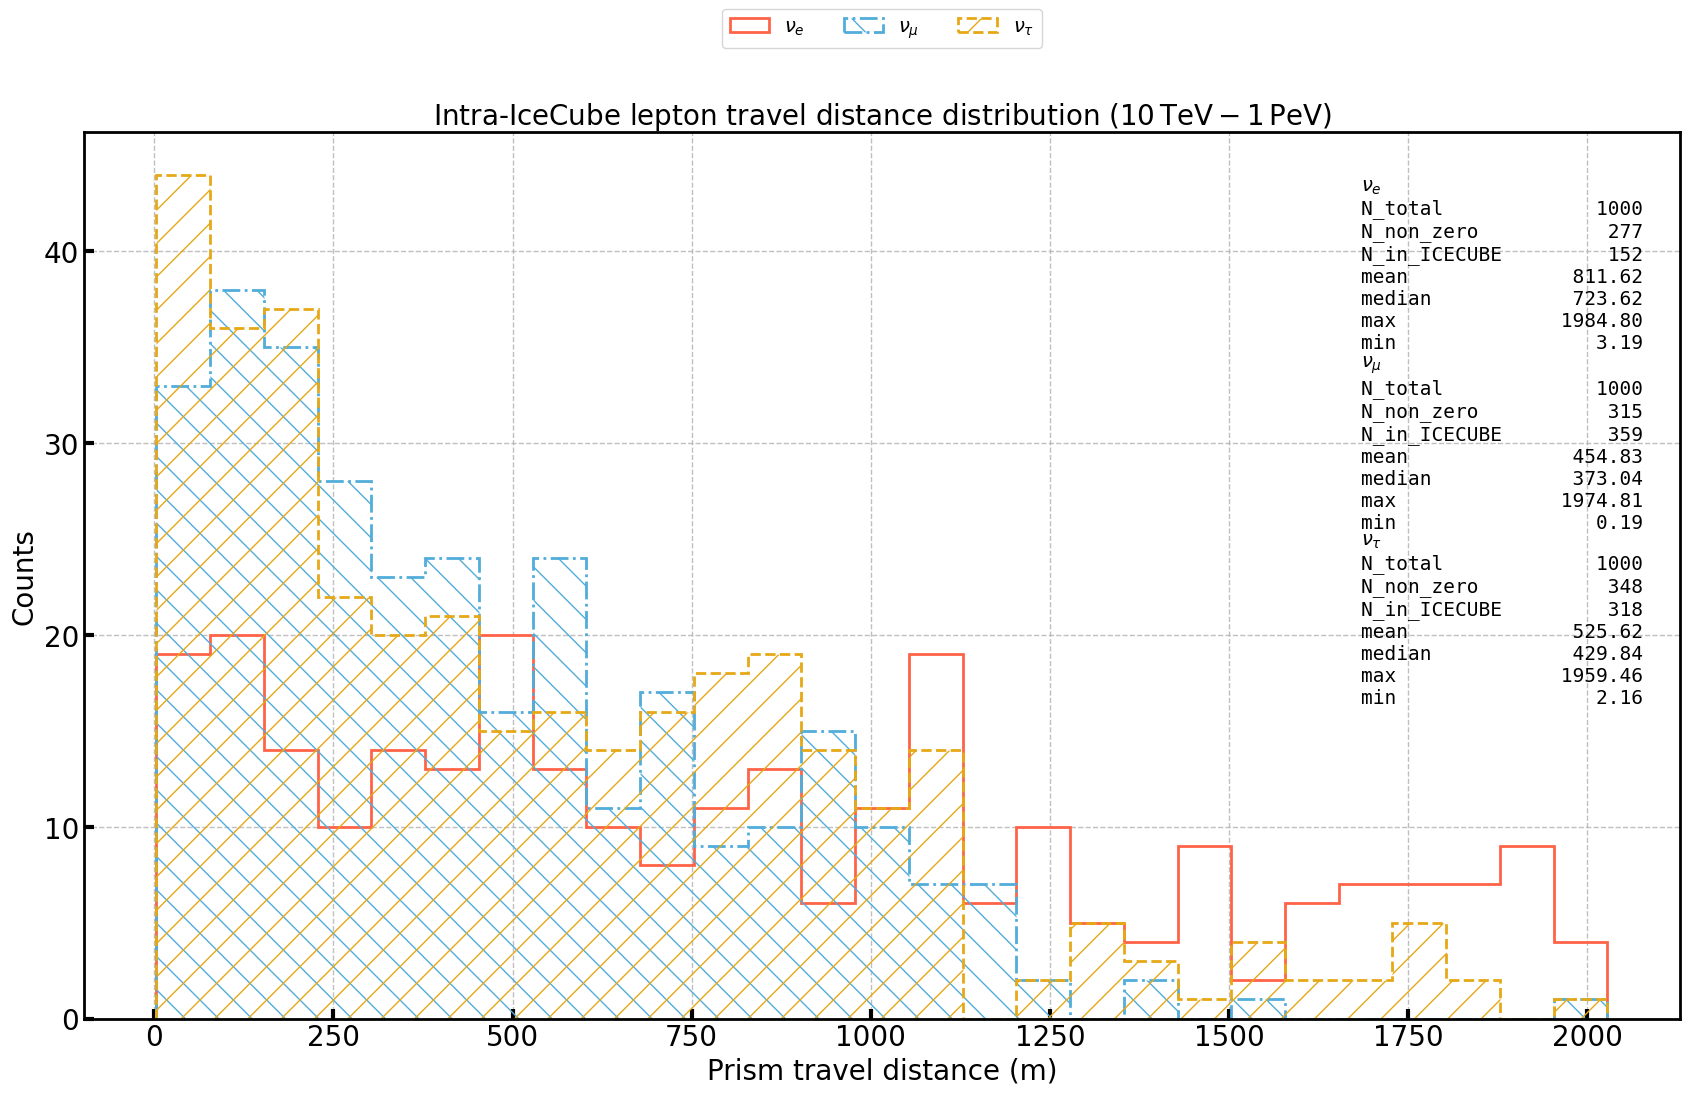

In [75]:
N = 1000
plot_prism_travel_distance_distrubution(df_e=df_TeV_nu_mu_1_truth[:N],
                                        df_mu=df_TeV_nu_e_1_truth[:N],
                                        df_tau=df_TeV_nu_tau_1_truth[:N],
                                        er=EnergyRange.ER_10_TEV_1_PEV)


In [82]:
def get_events_contained_zero_distance(df: pd.DataFrame) -> pd.DataFrame:
    """
    Return a DataFrame containing events that are geometrically contained within IceCube
    but have zero prism travel distance.
    """
    df = add_intersection_and_distance(df.copy())

    mask = (df["isWithinIceCube"] == True) & (df["prism_travel_distance"] < 1e-3)

    return df.loc[mask]


In [85]:
get_events_contained_zero_distance(df_TeV_nu_mu_1_truth[:N])['event_no'][:10]

6      111000100000006
27     111000100000027
57     111000100000057
77     111000100000077
87     111000100000087
93     111000100000093
106    111000100000106
116    111000100000116
141    111000100000141
142    111000100000142
Name: event_no, dtype: int64

In [78]:
class IntersectionType(Enum):
    NO_INTERSECTION = (0, 0)
    SINGLE_INTERSECTION = (1, 0)  # almost impossible
    ENTRY_EXIT_VERTEX = (2, 0)    # entry point - exit point - vertex
    ENTRY_VERTEX_EXIT = (2, 1)    # entry point - vertex - exit point 
    VERTEX_ENTRY_EXIT = (2, 2)    # vertex - entry point - exit point
    
    def __init__(self, n_intersections: int, geometric_order: int):
        self._n_intersections = n_intersections
        self._geometric_order = geometric_order

    @staticmethod
    def get_intersection_type(n_intersections: int, geometric_order: int):
        for it in IntersectionType:
            if it.n_intersections == n_intersections and it.geometric_order == geometric_order:
                return it
        return IntersectionType.NO_INTERSECTION

    @property
    def n_intersections(self) -> int:
        return self._n_intersections

    @property
    def geometric_order(self) -> int:
        return self._geometric_order

    @property
    def is_lepton_length_valid(self) -> bool:
        return self.geometric_order != 0


In [79]:
def plot_intersections_and_vertex(df_event, elev=60, azim=240):
    vertex_x = df_event['pos_x_GNHighestEDaughter']
    vertex_y = df_event['pos_y_GNHighestEDaughter']
    vertex_z = df_event['pos_z_GNHighestEDaughter']
    
    entry_x = df_event['pos_x_entry']
    entry_y = df_event['pos_y_entry']
    entry_z = df_event['pos_z_entry']
    
    exit_x = df_event['pos_x_exit']
    exit_y = df_event['pos_y_exit']
    exit_z = df_event['pos_z_exit']
    
    # Create 3D plot
    fig, ax = plt.subplots(figsize=(18, 14), subplot_kw={'projection': '3d'})
    ax.scatter(vertex_x, vertex_y, vertex_z, color=getColour(0), marker='x', s=100, label='Vertex')
    ax.text(vertex_x, vertex_y, vertex_z, f"({vertex_x:.2f}, {vertex_y:.2f}, {vertex_z:.2f})", fontsize=10, ha='center', color='black')
    ax.scatter(entry_x, entry_y, entry_z, color=getColour(1), marker='o', s=100, label='Entry')
    ax.text(entry_x, entry_y, entry_z, f"({entry_x:.2f}, {entry_y:.2f}, {entry_z:.2f})", fontsize=10, ha='center', color='black')
    ax.scatter(exit_x, exit_y, exit_z, color=getColour(2), marker='o', s=100, label='Exit')
    ax.text(exit_x, exit_y, exit_z, f"({exit_x:.2f}, {exit_y:.2f}, {exit_z:.2f})", fontsize=10, ha='center', color='black')
    
    # connect 
    intersection_type = IntersectionType.get_intersection_type(df_event['n_intersections'], df_event['intersection_vertex_order'])
    if intersection_type == IntersectionType.ENTRY_VERTEX_EXIT:
        # plot a line connecting vertex to exit
        ax.plot([vertex_x, exit_x], [vertex_y, exit_y], [vertex_z, exit_z], linestyle='--', color = getColour(3), label='Vertex to Exit')
        lepton_travel_distance = np.linalg.norm([vertex_x - exit_x, vertex_y - exit_y, vertex_z - exit_z])
    elif intersection_type == IntersectionType.VERTEX_ENTRY_EXIT:
        # plot a line connecting entry to exit
        ax.plot([entry_x, exit_x], [entry_y, exit_y], [entry_z, exit_z], linestyle='--', color = getColour(4), label='Entry to Exit')
        lepton_travel_distance = np.linalg.norm([entry_x - exit_x, entry_y - exit_y, entry_z - exit_z])
    else:
        lepton_travel_distance = 0
    
    for x, y in border_xy:
        ax.plot([x, x], [y, y], border_z, color='cyan', alpha=0.5, linestyle='-')
    
    # Set plot labels and title
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    ax.legend()
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"intersections: event {df_event['event_no']:.0f}")
    is_vertex_in_IceCube = df_event['isWithinIceCube']
    
    d = {"lepton travel length": f"{lepton_travel_distance:.2f} m",
         "vertex in IceCube": "True" if is_vertex_in_IceCube else "False",}

    fig.text(0.25, 0.75, nice_string_output(d), fontsize=14)
    
    plt.show()


In [80]:
def show_peculiar_events(df: pd.DataFrame, n: int = 5):
    df_peculiar_events = get_events_contained_zero_distance(df[:n*10])  # give some margin in case
    event_list = df_peculiar_events['event_no'].unique()
    
    for event_no in event_list[:n]:
        print(f"\n🧊 Event number: {event_no}")
        df_event = df_peculiar_events[df_peculiar_events['event_no'] == event_no].iloc[0]

        # Diagnostic block
        pos = np.array([
            df_event['pos_x_GNHighestEDaughter'], 
            df_event['pos_y_GNHighestEDaughter'], 
            df_event['pos_z_GNHighestEDaughter']
        ])
        dir = np.array([
            df_event['dir_x_GNHighestEDaughter'], 
            df_event['dir_y_GNHighestEDaughter'], 
            df_event['dir_z_GNHighestEDaughter']
        ])

        print("Vertex:", pos)
        print("Direction:", dir)
        intersections = find_line_prism_intersections(pos, dir)
        t_values = [(np.dot(p - pos, dir) / np.dot(dir, dir), p) for p in intersections]
        print("Intersections:", intersections)
        print("t_values:", t_values)
        print("Result:", compute_prism_travel_distance(pos, dir))

        # Plot the event
        plot_intersections_and_vertex(df_event, elev=75, azim=240)


In [81]:
show_peculiar_events(df_TeV_nu_e_1_truth, n=5)


🧊 Event number: 114000100000000
Vertex: [  23.43784  272.26703 -358.36868]
Direction: [-0.85141003 -0.45490465 -0.26107982]
Intersections: []
t_values: []
Result: 0.0


KeyError: 'pos_x_entry'